In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
df = pd.read_csv('btcusd(2017onwards).csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume,Currency
2017-01-01,2017-01-01,963.4,1001.6,956.1,995.4,41149,USD
2017-01-02,2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD
2017-01-03,2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD
2017-01-04,2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD
2017-01-05,2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD
...,...,...,...,...,...,...,...
2022-05-30,2022-05-30,29465.2,32185.6,29307.2,31723.3,129556,USD
2022-05-31,2022-05-31,31730.2,32377.5,31221.2,31793.4,86600,USD
2022-06-01,2022-06-01,31793.1,31969.9,29396.6,29798.5,135091,USD
2022-06-02,2022-06-02,29798.6,30638.5,29604.4,30455.5,81400,USD


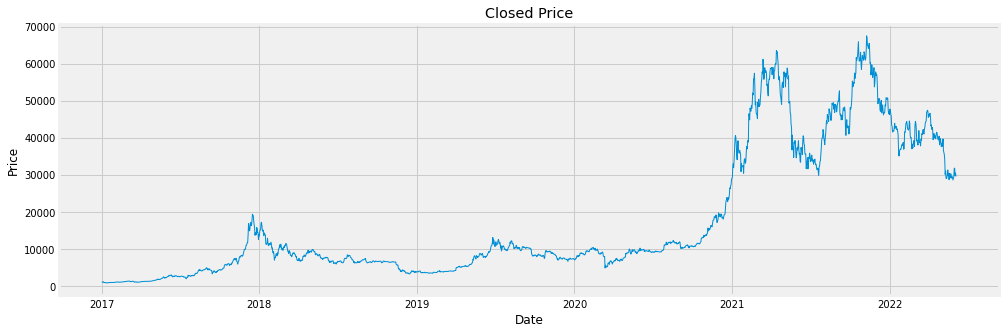

In [32]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'], label = 'Close', linewidth=1)
plt.title('Closed Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [40]:
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up < 0] = 0
down[down > 0] = 0
time_period = 14
AVG_Gain = up.rolling(window = time_period).mean()
AVG_Loss = abs(down.rolling(window = time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))
df

,Date,Open,High,Low,Close,Volume,Currency
2017-01-01,2017-01-01,963.4,1001.6,956.1,995.4,41149,USD
2017-01-02,2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD
2017-01-03,2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD
2017-01-04,2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD
2017-01-05,2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD
...,...,...,...,...,...,...,...
2022-05-30,2022-05-30,29465.2,32185.6,29307.2,31723.3,129556,USD
2022-05-31,2022-05-31,31730.2,32377.5,31221.2,31793.4,86600,USD
2022-06-01,2022-06-01,31793.1,31969.9,29396.6,29798.5,135091,USD
2022-06-02,2022-06-02,29798.6,30638.5,29604.4,30455.5,81400,USD


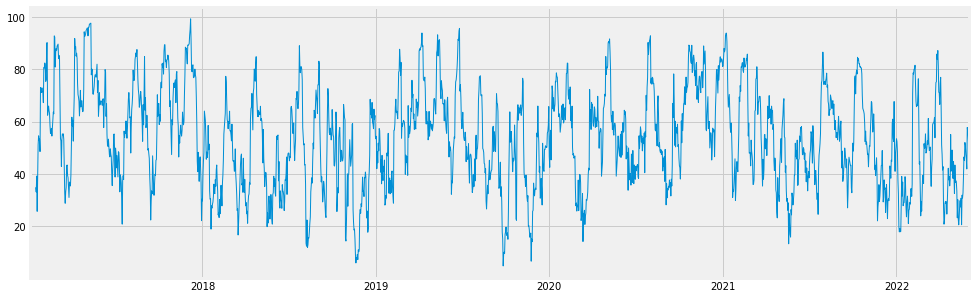

In [34]:
plt.figure(figsize=(15,5))
RSI.plot(linewidth=1)
plt.show()

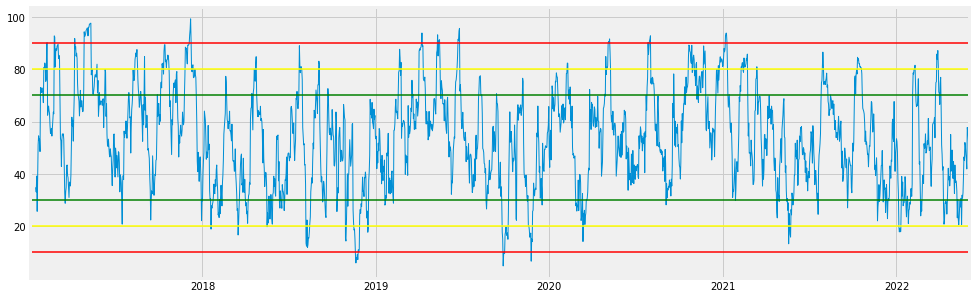

In [37]:
fig, ax = plt.subplots(1,1,figsize = (15,5))
ax0 = RSI.plot(ax=ax, linewidth=1)
ax0.axhline(30, color='green', linewidth=1.5)
ax0.axhline(70, color='green', linewidth=1.5)
ax0.axhline(20, color='yellow', linewidth=1.5)
ax0.axhline(80, color='yellow', linewidth=1.5)
ax0.axhline(10, color='red', linewidth=1.5)
ax0.axhline(90, color='red', linewidth=1.5)